Import Library

In [26]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Pemuatan Data

In [27]:
# Download dataset from Kaggle
path = kagglehub.dataset_download("imakash3011/online-shoppers-purchasing-intention-dataset")
print("Path to dataset files:", path)

# Load Dataset
df = pd.read_csv(f"{path}/online_shoppers_intention.csv")
print("Jumlah data:", len(df))


ConnectTimeout: HTTPSConnectionPool(host='www.kaggle.com', port=443): Max retries exceeded with url: /api/v1/datasets/view/imakash3011/online-shoppers-purchasing-intention-dataset (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x11f5dd1d0>, 'Connection to www.kaggle.com timed out. (connect timeout=5)'))

Pemahaman Data

In [17]:
# Informasi umum dataset
print(df.info())

# Statistik deskriptif
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Persiapan Data

Pada tahap ini, kita akan melakukan:​

Mengisi nilai yang hilang (jika ada).​
Mengonversi variabel kategorikal menjadi numerik menggunakan one-hot encoding.​
Memisahkan fitur dan label.​
Membagi dataset menjadi training set dan test set.​
Melakukan standarisasi fitur numerik.

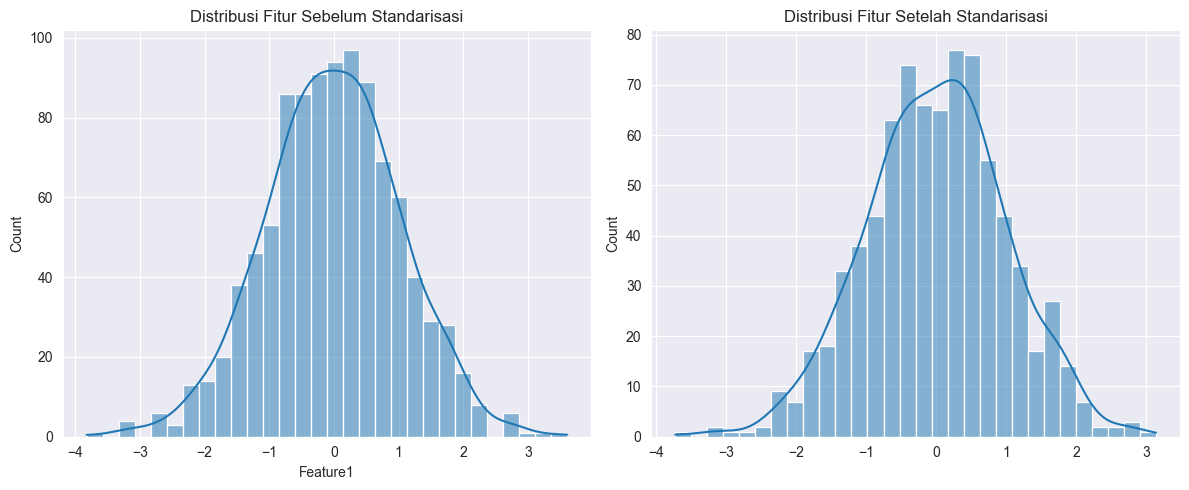

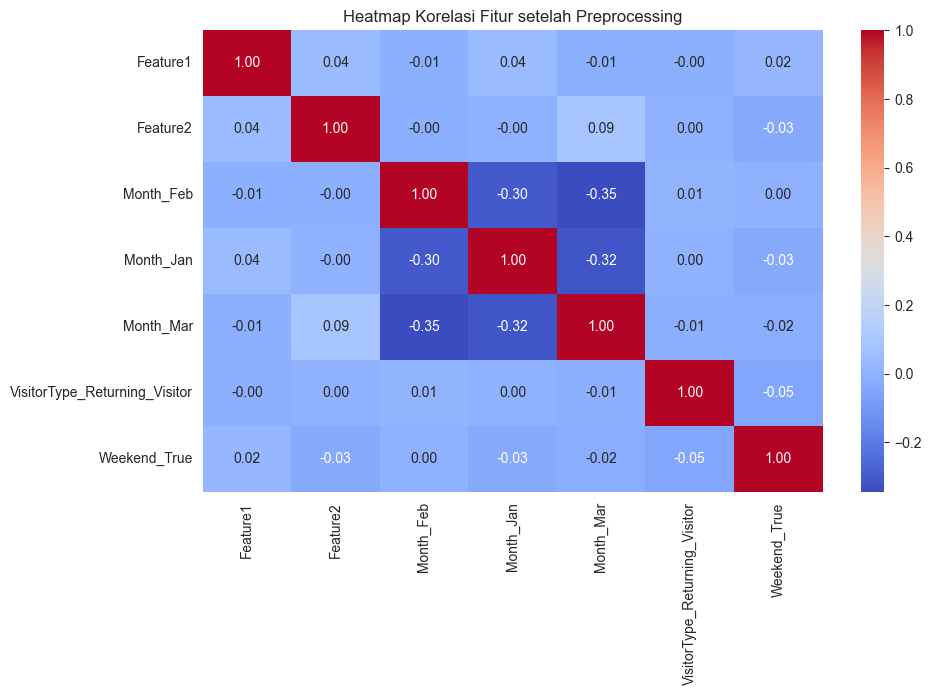

In [25]:
# Contoh dataset (digunakan jika dataset tidak tersedia)
data = {
    "Revenue": np.random.choice([0, 1], size=1000),
    "Month": np.random.choice(["Jan", "Feb", "Mar", "Apr"], size=1000),
    "VisitorType": np.random.choice(["Returning_Visitor", "New_Visitor"], size=1000),
    "Weekend": np.random.choice([True, False], size=1000),
    "Feature1": np.random.randn(1000),
    "Feature2": np.random.randn(1000)
}

df = pd.DataFrame(data)

# Mengisi nilai yang hilang pada kolom numerik dengan rata-rata
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)

# One-hot encoding untuk variabel kategorikal
categorical_features = ['Month', 'VisitorType', 'Weekend']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Memisahkan fitur dan label
X = df.drop(columns=['Revenue'])
y = df['Revenue'].astype(int)

# Membagi dataset menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualisasi distribusi data sebelum dan sesudah preprocessing
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Sebelum Standarisasi
sns.histplot(X.iloc[:, 0], ax=axes[0], kde=True, bins=30)
axes[0].set_title("Distribusi Fitur Sebelum Standarisasi")

# Sesudah Standarisasi
sns.histplot(X_train[:, 0], ax=axes[1], kde=True, bins=30)
axes[1].set_title("Distribusi Fitur Setelah Standarisasi")

plt.tight_layout()
plt.show()

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(X_train, columns=X.columns).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur setelah Preprocessing")
plt.show()

Pelatihan Model

Kita akan menggunakan algoritma Random Forest Classifier untuk melatih model.

In [19]:
# Inisialisasi model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Pelatihan model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluasi Model

Setelah model dilatih, kita akan mengevaluasi kinerjanya menggunakan metrik akurasi, precision, recall, F1-score, dan confusion matrix.

Akurasi: 89.25%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.75      0.54      0.62       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.89      2466



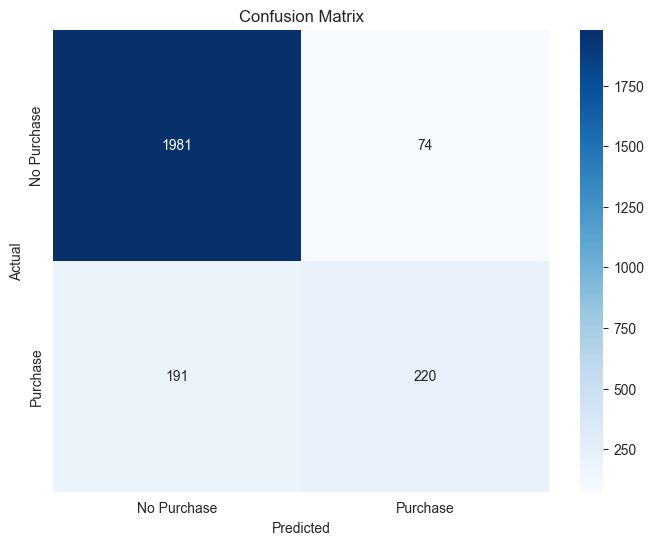

In [20]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2%}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()